In [1]:
import math
import numpy as np 
import pylab as pl
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy import fftpack  
import scipy.signal as signal
from scipy import interpolate
import pandas as pd

In [2]:
f=open('')
df=pd.read_csv(f,header=-1,dtype='float32')
df = df.head(800)

In [3]:
data=np.array(df[1])
Y = data
print(Y)

[49.5  51.4  51.2  51.6  51.8  52.8  53.4  53.4  53.5  52.6  51.2  50.6
 49.3  50.1  48.9  48.   48.2  47.2  47.   47.4  46.8  45.6  45.8  46.
 46.1  44.3  44.6  44.7  44.5  44.6  46.2  46.5  47.1  47.4  49.   49.3
 47.6  48.6  46.5  46.8  46.5  47.   47.9  48.   48.   47.8  48.6  48.7
 47.9  48.   49.4  50.1  50.7  51.7  51.8  50.9  52.2  52.9  52.5  51.5
 52.1  52.   52.4  51.5  51.2  49.8  50.3  50.1  51.6  51.9  52.1  51.9
 52.1  51.8  51.9  52.7  53.   52.7  53.8  54.7  54.   54.4  54.   55.
 55.9  56.7  56.6  55.4  56.1  57.   57.2  57.7  59.3  59.2  58.8  58.4
 57.2  55.8  56.3  56.2  57.2  55.2  55.4  56.5  55.8  55.3  56.5  57.5
 57.3  57.7  57.5  57.6  57.7  57.8  52.9  58.8  60.3  60.4  60.9  60.9
 60.5  61.3  64.1  64.   64.   64.5  64.2  63.   61.   61.3  61.1  61.9
 61.4  62.   62.6  62.9  63.4  63.2  63.7  63.3  63.2  64.5  63.4  63.3
 62.1  62.6  64.   65.2  64.7  63.3  63.6  63.7  63.8  63.4  64.4  64.5
 64.3  66.1  66.1  66.5  66.6  68.1  68.7  68.2  68.3  69.1  69.9 

In [4]:
def init_t(length_data,delt_t):
    a=np.zeros(length_data)
    for i in range(length_data):
        a[i]=i*delt_t
    return a

In [5]:
length_data=len(data)
delt_t=0.05
t=init_t(length_data,delt_t)
t

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
        1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,
        2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,
        2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,  3.05,  3.1 ,
        3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,  3.5 ,  3.55,
        3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,  3.95,  4.  ,
        4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,  4.4 ,  4.45,
        4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,  4.85,  4.9 ,
        4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,
        5.4 ,  5.45,  5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,
        5.85,  5.9 ,  5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,
        6.3 ,  6.35,

###  Experiment

In [6]:
extremeNumR=6
jianGeNum=1
itr_num= 100

In [7]:
def findpeaks(x):
    return signal.argrelextrema(x,np.greater)[0]

In [8]:
def calculate1(t_left_first, y_left_first, t_left_third, y_left_third, t_first):##t_left[0], y_left[0], t_left[2], y_left[2], t[0]
    return y_left_first+(y_left_first-y_left_third)/(t_left_first-t_left_third)*(t_first-t_left_first)

In [9]:
def left_boundary_1(t, Y, extremepoint, left_boundary_2, calculate1):
    t_left = np.zeros(4)
    y_left = np.zeros(4)
    for i in range(4):
        t_left[i] = t[extremepoint[i]]
        y_left[i] = Y[extremepoint[i]]
    left_boundary = left_boundary_2(t_left,y_left,t[0],Y[0],calculate1)
    extremepoint_len=len(extremepoint)
    t_right = np.zeros(4)
    y_right = np.zeros(4)
    for i in range(4):
        t_right[i]=t[extremepoint[extremepoint_len-1-i]]
        y_right[i]=Y[extremepoint[extremepoint_len-1-i]]
    last = len(t) - 1
    #print(y_right,t_right)
    right_boundary = left_boundary_2(t_right,y_right,t[last],Y[last],calculate1)
    boundary=list()
    boundary.append(left_boundary)
    boundary.append(right_boundary)
    return boundary

In [10]:
def left_boundary_2(t_left,y_left,t_first,y_first,calculate1):###t_left,y_left,t[0],y[0]
    b1=calculate1(t_left[0], y_left[0], t_left[2], y_left[2], t_first)
    b2=calculate1(t_left[1], y_left[1], t_left[3], y_left[3], t_first)
    b3=(b1+b2)/2
    b4=abs(b1-b2)/2
    b5 = abs(y_first - b3)
    b7 = t_first
    b8 = y_first 
    b9 = t_left[1]
    b10= y_left[1]
    b11=t_left[0]
    b12=y_left[0]
    b13 = t_first
    b14 = b8 - b10
    b6 = (b14 / (b7 - b9)) * (b13 - b11) + b12
    if b1<b2:
        b=b2
        b2=b1
        b1=b
    boundary=np.zeros(2)
    if b2<=y_first and y_first<=b1:
        boundary[0]=b2#########0 is up boundary，1 is down boundary
        boundary[1]=b1
    elif b1< y_first and b5 < b4 * 2:
        boundary[0]=b2
        boundary[1]=y_first
    elif y_first<b2 and b5 < b4 * 2:
        boundary[0]=y_first
        boundary[1]=b1
    elif b5>=2*b4:
        if y_first<= b6:
            boundary[0]=y_first
            boundary[1]=b6
        else:
            boundary[0]=b6
            boundary[1]=y_first
    return boundary

In [11]:
def b(t,Y, itr_num, extremeNumR, findpeaks, left_boundary_1, left_boundary_2, calculate1, jianGeNum):
    std_Y=np.sqrt(np.var(Y))#std
    stop_error=0.001*std_Y#sigma,termination
    extremeNumR_stop=max(4,extremeNumR)
    maxpoint_position=findpeaks(Y)
    minpoint_position=findpeaks(-Y)
    extremepoint=np.sort(np.hstack((maxpoint_position,minpoint_position)))
    isStop = False
    if len(extremepoint)< extremeNumR_stop:
        isStop = True
        return isStop, Y
    i = 1
    while i<=itr_num:
        maxpoint_position=findpeaks(Y)
        minpoint_position=findpeaks(-Y)
        extremepoint=np.sort(np.hstack((maxpoint_position,minpoint_position)))
        #print(len(extremepoint))
        if len(extremepoint)< extremeNumR_stop:
            isStop= False
            return isStop, Y
        boundary=left_boundary_1(t, Y, extremepoint, left_boundary_2, calculate1)    
        t_med = np.zeros(len(extremepoint)-1)
        y_med = np.zeros(len(extremepoint)-1)
        for a in range(len(extremepoint)-1):
            t_med[a] = (t[extremepoint[a]] + t[extremepoint[a + 1]]) / 2.0
            y_med[a] = (Y[extremepoint[a]] + Y[extremepoint[a + 1]]) / 2.0
        Y_decomposition = np.zeros(len(Y))
        for b in range(1,jianGeNum + 1+1):
            coordinate = b-1
            remainder = len(t_med) %  (jianGeNum + 1)
            answer = len(t_med) // (jianGeNum + 1)
            if remainder == 0:
                length = answer
            else:
                if b <= remainder:
                    length = answer+1
                else:
                    length = answer
            select_t_med = np.zeros(length)
            select_Y_med = np.zeros(length)
            for c in range(length):
                select_t_med[c] = t_med[coordinate]
                select_Y_med[c] = y_med[coordinate]
                coordinate = coordinate + jianGeNum + 1
            select_t_med_final = np.zeros(length + 2)
            select_Y_med_final = np.zeros(length + 2)
            select_t_med_final[0] = t[0]
            select_Y_med_final[0] = (boundary[0][0] + boundary[0][1]) / 2  
            select_t_med_final[length + 1] = t[len(Y) - 1]     #t[i2]
            select_Y_med_final[length + 1] = (boundary[1][0] + boundary[1][1]) / 2 
            for d in range(1,length+1):
                select_t_med_final[d] = select_t_med[d-1] #t_med
                select_Y_med_final[d] = select_Y_med[d-1] #y_med
            tck = interpolate.splrep(select_t_med_final,select_Y_med_final)
            Y_part_decomposition = interpolate.splev(t,tck,der=0)
            Y_decomposition = Y_decomposition + Y_part_decomposition
        if jianGeNum>0:
            Y_decomposition = Y_decomposition/(jianGeNum+1)
        max_insert = max(abs(Y_decomposition))
        if max_insert > stop_error: 
            Y = Y - Y_decomposition
        else:
            isStop = False
            return isStop, Y
            #break
        i += 1
    return  isStop, Y   

In [12]:
noise_number = 100
Nstd = 0.2
noise_array=np.random.randn(noise_number,length_data)
print(noise_array)

[[ 0.44466854 -0.01599333  0.69515894 ...  0.36504731  1.31312296
   0.44594004]
 [ 0.54494926  0.00902027  0.93821616 ...  0.23603838 -1.22600406
  -0.35648004]
 [-0.1122178  -1.14412942  0.02567739 ...  0.27565382 -0.73761039
   1.27887178]
 ...
 [ 2.28377745  0.95343657 -0.18035415 ...  0.42108716 -0.31200894
   0.42521509]
 [-0.81729611  0.65145249  1.13549225 ...  0.56912154  0.26146382
   1.83758152]
 [ 0.14072811 -0.22293321  0.42939361 ... -0.65762377 -0.21002531
   0.65129955]]


In [13]:
def esmd_array(t,Y, itr_num, extremeNumR, findpeaks, left_boundary_1, left_boundary_2, calculate1, jianGeNum, b):
    arrayOfDouble7 = Y
    isStop = False
    esmd_list =[]
    i = 0 
    while True:
        arrayOfDouble = arrayOfDouble7
        isStop, arrayOfDouble = b(t,arrayOfDouble, itr_num, extremeNumR, findpeaks, left_boundary_1, left_boundary_2, calculate1, jianGeNum)
        esmd_list.append(arrayOfDouble)
        #i += 1
        #print(i)
        #if i >3:
            #break
        if not isStop:
            arrayOfDouble7 = arrayOfDouble7 - arrayOfDouble
            continue
        break
    return esmd_list

In [14]:
all_esmd_noise = []
each_noise = []
for i in range(noise_number):
    each_noise = esmd_array(t, noise_array[i], itr_num, extremeNumR, findpeaks, left_boundary_1, left_boundary_2, calculate1, jianGeNum, b)
    all_esmd_noise.append(each_noise)
    each_noise = []

In [15]:
#true_false_matrix = [False for _ in range(100)]
#len(true_false_matrix)

In [16]:
aux = np.zeros(length_data)#length_data=1000
for i in range(noise_number): #calculates the first mode
    temp = Y + Nstd*noise_array[i]
    isStop,temp = b(t, temp, itr_num, extremeNumR, findpeaks, left_boundary_1, left_boundary_2, calculate1, jianGeNum)
    #print(aux+temp/noise_number,type(temp))
    #true_false_matrix[i] = isStop
    aux = aux+temp/noise_number

In [17]:
acum = aux
modes = []
modes.append(aux)
aux = np.zeros(length_data)#length_data=1000 
final_stop, test_imf = b(t, Y-acum, itr_num, extremeNumR, findpeaks, left_boundary_1, left_boundary_2, calculate1, jianGeNum)
k = 1

In [18]:
final_stop = False
while not final_stop:
    for i in range(noise_number):
        length = len(all_esmd_noise[i])
        if length >= k+1:
            noise = all_esmd_noise[i][k-1]
            noise = noise/np.std(noise)
            noise = Nstd*noise
            isStop,temp = b(t, Y-acum+np.std(Y-acum)*noise, itr_num, extremeNumR, findpeaks, left_boundary_1, left_boundary_2, calculate1, jianGeNum)
        else:
            isStop,temp = b(t, Y-acum, itr_num, extremeNumR, findpeaks, left_boundary_1, left_boundary_2, calculate1, jianGeNum)
        aux = aux+temp/noise_number
    modes.append(aux)
    acum = acum+aux
    aux = np.zeros(length_data)
    k = k+1
    final_stop, test_imf = b(t, Y-acum, itr_num, extremeNumR, findpeaks, left_boundary_1, left_boundary_2, calculate1, jianGeNum)
modes.append(Y-acum)

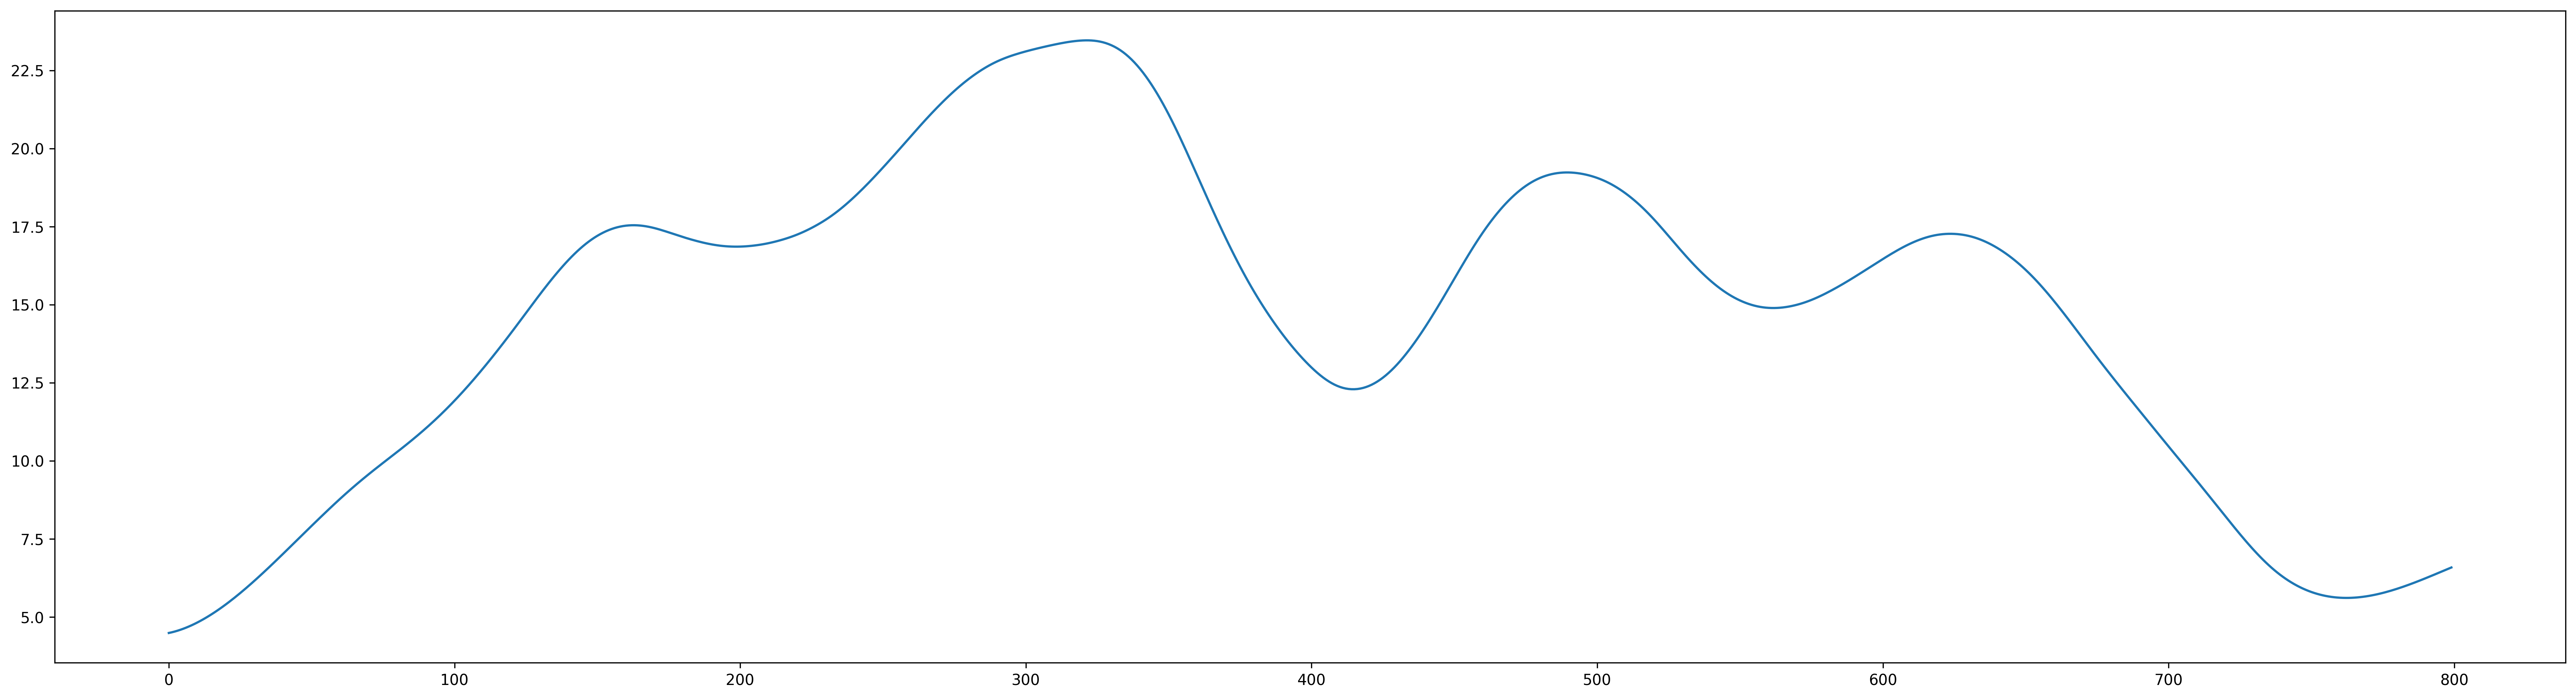

In [19]:
from matplotlib import pyplot as plt
plt.figure(dpi=300,figsize=(30,8))
plt.plot(modes[8])

In [20]:
def modified_hurst(ts):
    ts = list(ts)
    N = len(ts)
    if N < 20:
        raise ValueError("Time series is too short! input series ought to have at least 20 samples!")

    max_k = int(np.floor(N/2))
    log_Hn_dict = []
    for k in range(2,max_k+1):
        R,S,RS = 0,0,0
        # split ts into subsets
        subset_list = [ts[i:i+k] for i in range(0,N,k)]
        if np.mod(N,k)>0:
            subset_list.pop()
            #tail = subset_list.pop()
            #subset_list[-1].extend(tail)
        # calc mean of every subset
        mean_list=[np.mean(x) for x in subset_list]
        for i in range(len(subset_list)):
            cumsum_list = pd.Series(subset_list[i]-mean_list[i]).cumsum()
            R = max(cumsum_list)-min(cumsum_list)
            S = np.std(subset_list[i])
            RS += (R/S)/len(subset_list)
        #R_S_dict.append({"RS":RS,"n":k})
        sum_n = 0
        n = k
        for i in range(1,n):
            sum_n += math.sqrt((k-i)/i)
        if n==340:
            continue
        elif n < 340:
            ERS = ((k-0.5)*math.gamma((k-1)/2)*sum_n)/(k*math.gamma(k/2)*math.sqrt(math.pi))
        else:
            ERS = ((k-0.5)*sum_n)/(k*math.sqrt((k*math.pi)/2))
        log_Hn = np.log(RS)-np.log(ERS)+np.log(k)/2
        #print(ERS,log_Hn,k)
        log_Hn_dict.append({"log_Hn":log_Hn,"log_n":np.log(k)})
    log_H_n = []
    log_n = []
    #print(log_Hn_dict)
    for i in range(len(log_Hn_dict)):
        #R_S = (R_S_dict[i]["R"]+np.spacing(1)) / (R_S_dict[i]["S"]+np.spacing(1))
        log_H_n.append(log_Hn_dict[i]["log_Hn"])
        log_n.append(log_Hn_dict[i]["log_n"])

    modified_Hurst_exponent = np.polyfit(log_n,log_H_n,1)[0]
    return modified_Hurst_exponent

In [21]:
mode_length = len(modes)
mode_short = np.zeros(length_data)
mode_medium = np.zeros(length_data)
mode_long = np.zeros(length_data)
for i in range(mode_length):
    modified_Hurst_exponent = modified_hurst(modes[i])
    if modified_Hurst_exponent <= 0.5:
        mode_short = mode_short + modes[i]
    elif 0.5 < modified_Hurst_exponent < 0.75:
        mode_medium = mode_medium + modes[i]
    else:
        mode_long = mode_long + modes[i]

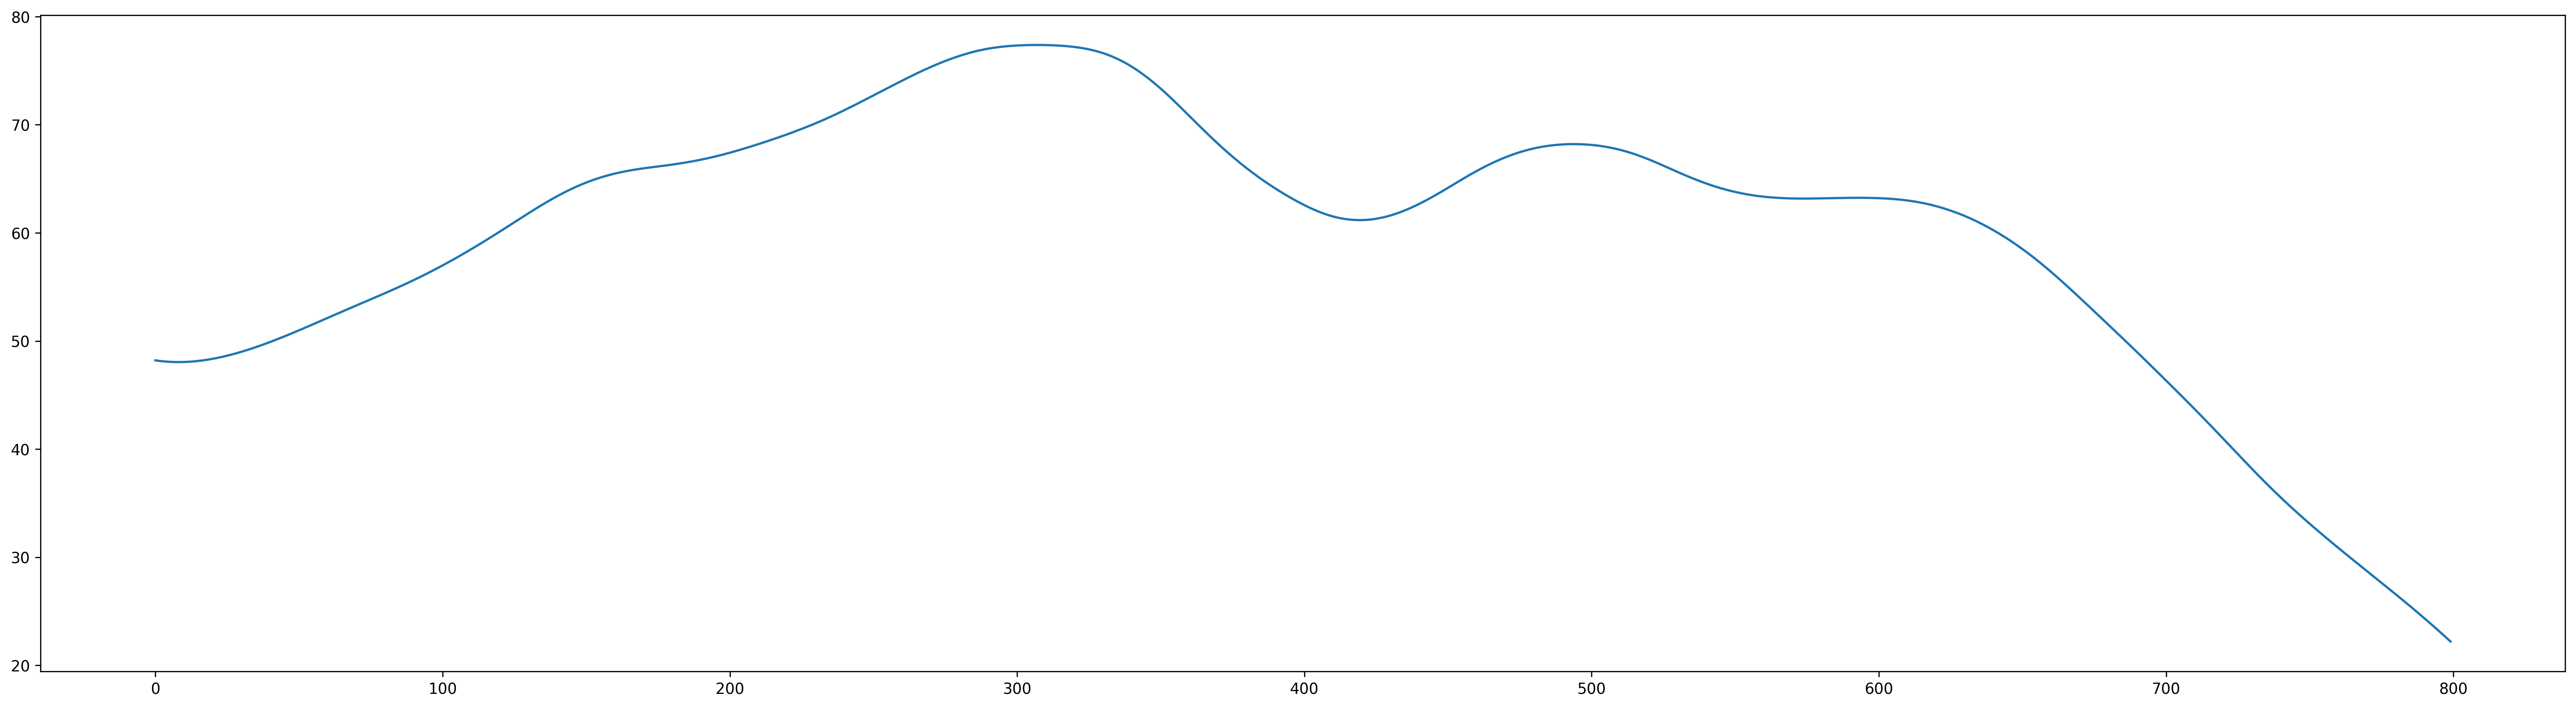

In [22]:
plt.figure(dpi=300,figsize=(30,8))
plt.plot(mode_long)

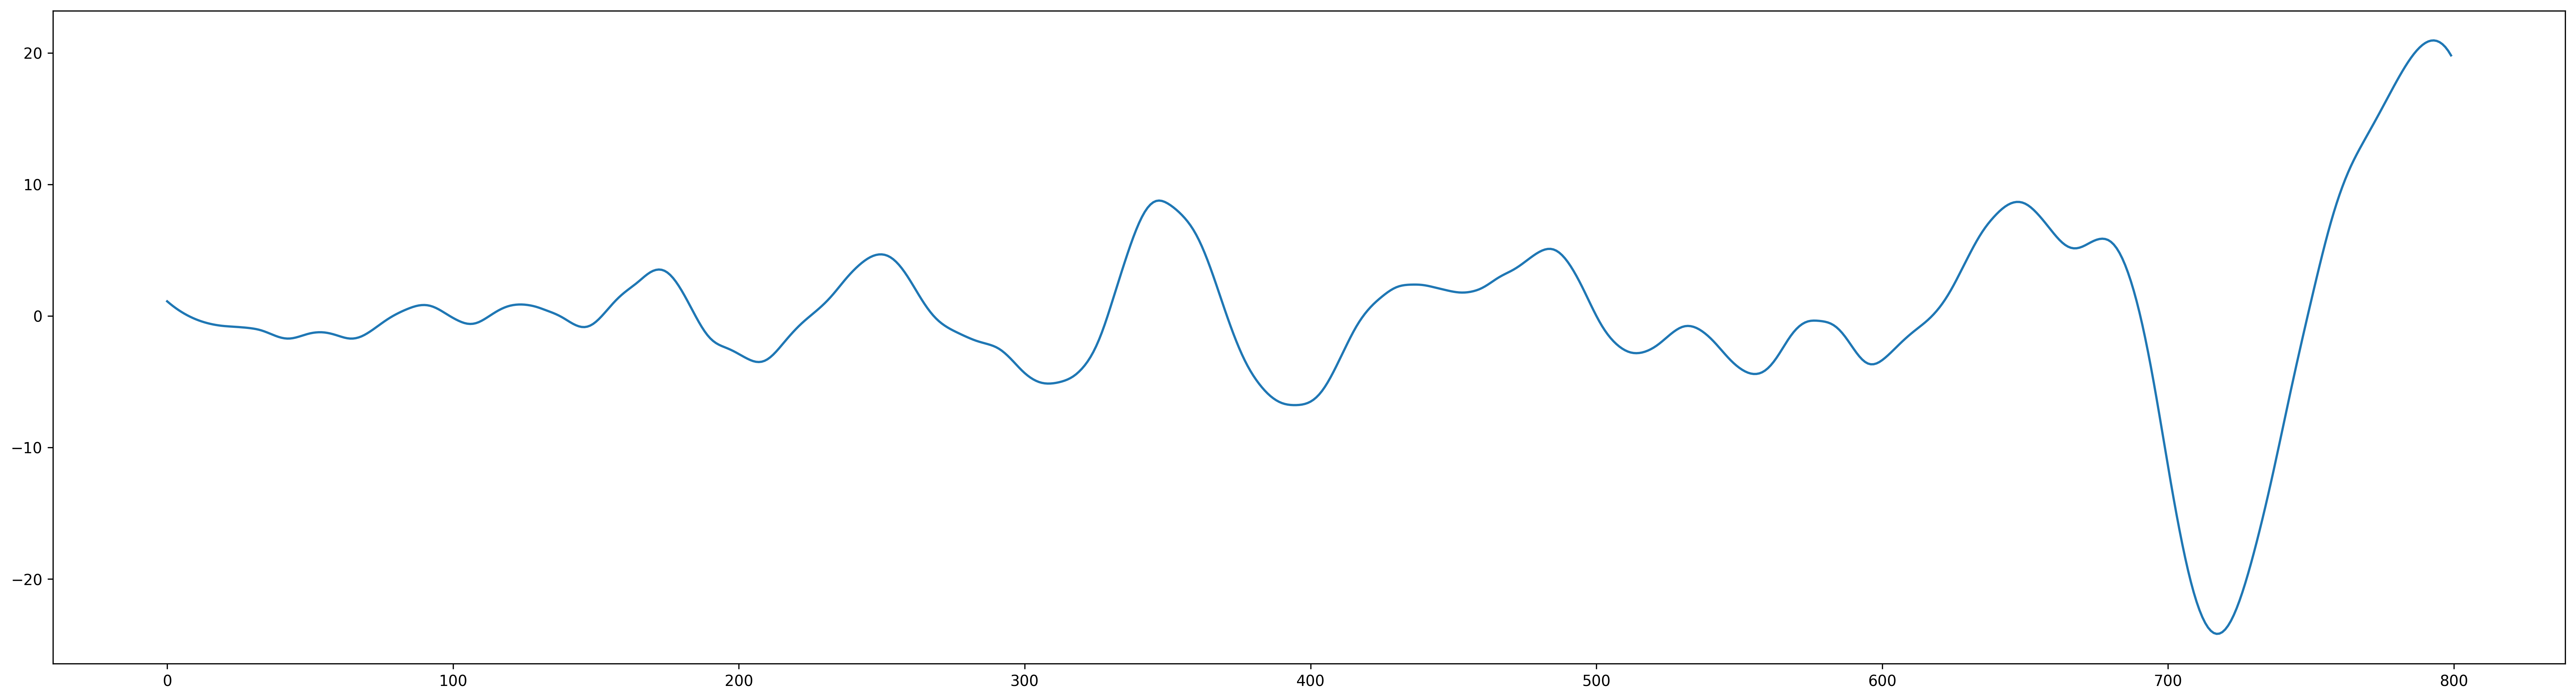

In [23]:
plt.figure(dpi=300,figsize=(30,8))
plt.plot(mode_medium)

In [ ]:
plt.figure(dpi=300,figsize=(30,8))
plt.plot(mode_short)